# Make Sketch data from Target data

In this research, the target data is F3 field data in Netherlands.  
Please check the link for information regarding the target dataset.  
[Target data Link](https://terranubis.com/datainfo/F3-Demo-2020)

In [1]:
from utiles import*

In [2]:
# Display data index setting
section_index = 1
trace_index = 256
patch_index = 5

### Raw data

(3, 128, 512)


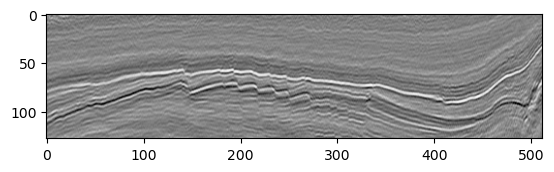

In [3]:
data = np.load("data/target_sample.npy")
print(data.shape)
plt.imshow(data[section_index],cmap='Greys')

### Scaled data

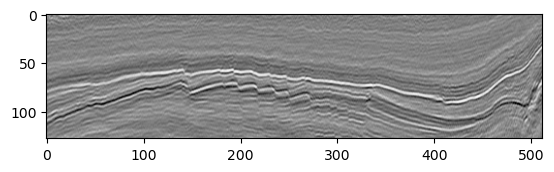

In [4]:
scaled_data = standard_scaler(data)
plt.imshow(scaled_data[section_index],cmap='Greys')

### P, PT, PA, PTA method

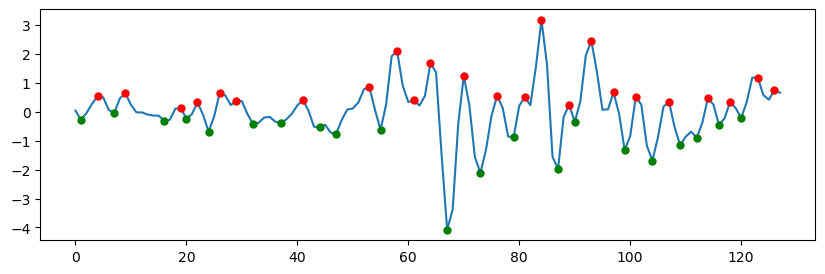

In [5]:
from scipy.signal import find_peaks
plt.figure(figsize=(10,3))
signal = scaled_data[section_index][:,trace_index]
peaks1, _ = find_peaks(signal, height=0)
peaks2, _ = find_peaks(-signal, height=0)
plt.plot(signal)
plt.plot(peaks1, signal[peaks1], "o", ms=5, c='red')
plt.plot(peaks2, signal[peaks2], "o", ms=5, c='green')
plt.show()

In [6]:
def find_peak_2d(data, method='P'):
    result = data.copy()
    result[:,:] = 0
    for i in range(data.shape[1]):
        signal = data[:,i]
        peaks1, _ = find_peaks(signal, height=0)
        peaks2, _ = find_peaks(-signal, height=0)
        if method=="P":
            result[:,i][peaks1] = 1
        if method=="PT":
            result[:,i][peaks1] = 1
            result[:,i][peaks2] = -1
        if method=="PA":
            result[:,i][peaks1] = data[:,i][peaks1]
        if method=="PTA":
            result[:,i][peaks1] = data[:,i][peaks1]
            result[:,i][peaks2] = data[:,i][peaks2]
    return result

### P method

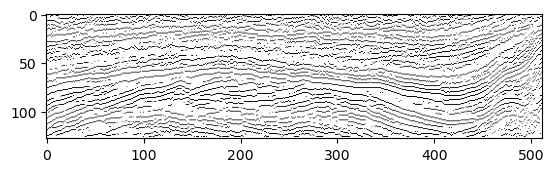

In [7]:
method = "P"
p_data = list()
for d in scaled_data:
    p_data.append(find_peak_2d(d,method))
pt_data = np.array(p_data)
plt.imshow(p_data[section_index],cmap='Greys')

### PT method

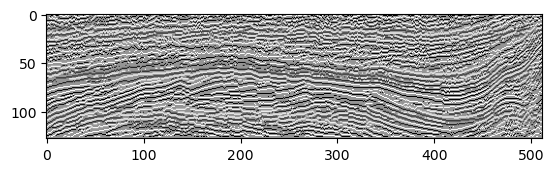

In [8]:
method = "PT"
pt_data = list()
for d in scaled_data:
    pt_data.append(find_peak_2d(d,method))
pt_data = np.array(pt_data)
plt.imshow(pt_data[section_index],cmap='Greys')

### PA method

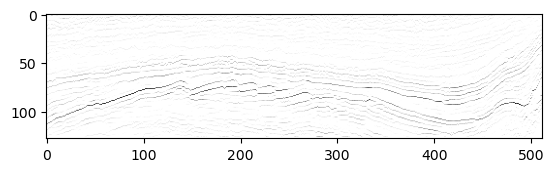

In [9]:
method = "PA"
pa_data = list()
for d in scaled_data:
    pa_data.append(find_peak_2d(d,method))
pa_data = np.array(pa_data)
plt.imshow(pa_data[section_index],cmap='Greys')

### PTA method

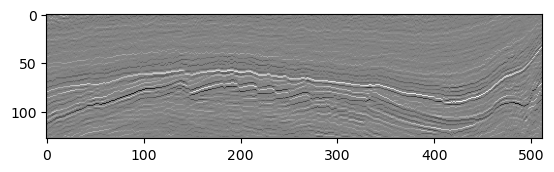

In [10]:
method = "PTA"
pta_data = list()
for d in scaled_data:
    pta_data.append(find_peak_2d(d,method))
pta_data = np.array(pta_data)
plt.imshow(pta_data[section_index],cmap='Greys')

### Make patch data (128x128)

In [11]:
def gen_patch4(arr):
    output = []  
    for i in range(len(arr)):
        output.append(arr[i][:,:128])
        output.append(arr[i][:,128:256])
        output.append(arr[i][:,256:384])
        output.append(arr[i][:,384:])
    return np.array(output)

In [12]:
p_patch = gen_patch4(p_data)
pt_patch = gen_patch4(pt_data)
pa_patch = gen_patch4(pa_data)
pta_patch = gen_patch4(pta_data)
p_patch.shape, pt_patch.shape, pa_patch.shape, pta_patch.shape

((12, 128, 128), (12, 128, 128), (12, 128, 128), (12, 128, 128))

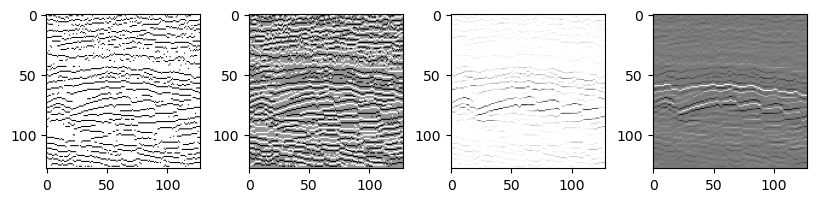

In [13]:
fig, ax = plt.subplots(1,4, figsize=(10,2))
ax[0].imshow(p_patch[patch_index],cmap='Greys')
ax[1].imshow(pt_patch[patch_index],cmap='Greys')
ax[2].imshow(pa_patch[patch_index],cmap='Greys')
ax[3].imshow(pta_patch[patch_index],cmap='Greys')

In [14]:
np.save("data/p_patch_sample.npy",p_data)
np.save("data/pt_patch_sample.npy",pt_data)
np.save("data/pa_patch_sample.npy",pa_data)
np.save("data/pta_patch_sample.npy",pta_data)